# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We aren't receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which doesn't amplify the sound enough to receive the message. Due to the volume of my speaker my students can't hear videos or books clearly and it isn't making the lessons as meaningful. But with the bluetooth speaker my students will be abl

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:49<00:00, 475.03it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:
# similarly you can preprocess the titles also

In [19]:
#some random project titles.
print(project_data["project_title"].values[5])
print('='*50)
print(project_data['project_title'].values[1000])
print('='*50)
print(project_data["project_title"].values[5000])
print('='*50)
print(project_data["project_title"].values[20000])
print('='*50)
print(project_data['project_title'].values[45000])

Flexible Seating for Mrs. Jarvis' Terrific Third Graders!!
Sailing Into a Super 4th Grade Year
Bouncing Our Wiggles and Worries Away!
We Need To Move It While We Input It!
Read, Write, and Art!


In [20]:
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:12<00:00, 8479.02it/s]


In [21]:
print(preprocessed_titles[1000])
print('='*50)
print(preprocessed_titles[40000])

sailing super th grade year
let read let learn let thrive


## 1.5 Preparing data for models

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [23]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [24]:
preprocessed_school_state=[]
for state in tqdm(project_data['school_state'].values):
    state=decontracted(state)
    state=state.replace(".",'')
    state=state.replace('"','')
    state=state.replace('-','')
    state=state.replace('_','')
    state=state.replace(' ','')
    state=re.sub('[^A-za-z]+','',state)
    preprocessed_school_state.append(state.strip())
print(preprocessed_school_state[:15])

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 21458.93it/s]


['IN', 'FL', 'AZ', 'KY', 'TX', 'FL', 'CT', 'GA', 'SC', 'NC', 'CA', 'CA', 'NY', 'OK', 'MA']


In [25]:
preprocessed_teacher_prefix=[]
for prefix in tqdm(project_data["teacher_prefix"].map(str).values):
    prefix=decontracted(prefix)
    prefix=prefix.replace(".",'')
    prefix=prefix.replace('"','')
    prefix=prefix.replace('-','')
    prefix=prefix.replace('_','')
    prefix=prefix.replace(' ','')
    prefix=re.sub('[^A-Za-z]+','',prefix)
    preprocessed_teacher_prefix.append(prefix.strip())
print(preprocessed_teacher_prefix[:15])

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 20918.54it/s]


['Mrs', 'Mr', 'Ms', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Ms', 'Mrs', 'Ms', 'Mrs', 'Ms', 'Mrs', 'Mrs', 'Ms']


In [26]:
print(project_data["project_grade_category"].values)
preprocessed_project_grade=[]
for grade in tqdm(project_data["project_grade_category"].values):
    grade=decontracted(grade)
    grade=grade.replace('.','')
    grade=grade.replace('"','')
    grade=grade.replace('-','')
    grade=grade.replace(' ','')
    grade=grade.replace('_','')
    grade=re.sub('[^A-Za-z0-9]+','',grade)
    preprocessed_project_grade.append(grade)
print(preprocessed_project_grade[:20])

['Grades PreK-2' 'Grades 6-8' 'Grades 6-8' ... 'Grades PreK-2'
 'Grades 3-5' 'Grades 6-8']


100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 19705.19it/s]


['GradesPreK2', 'Grades68', 'Grades68', 'GradesPreK2', 'GradesPreK2', 'Grades35', 'Grades68', 'Grades35', 'GradesPreK2', 'GradesPreK2', 'Grades35', 'GradesPreK2', 'Grades68', 'GradesPreK2', 'GradesPreK2', 'Grades35', 'GradesPreK2', 'Grades35', 'GradesPreK2', 'Grades35']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [27]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

#### 1.5.2.3 Using Pretrained Models: Avg W2V

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [28]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [29]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [30]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [31]:
project_data["preprocessed_school_state"]=preprocessed_school_state
project_data["preprocessed_teacher_prefix"]=preprocessed_teacher_prefix
project_data["preprocessed_project_grade"]=preprocessed_project_grade
project_data["preprocessed_titles"]=preprocessed_titles
project_data["preprocessed_essays"]=preprocessed_essays

In [32]:
data_set_0=project_data[["clean_categories","clean_subcategories","preprocessed_school_state","preprocessed_teacher_prefix","preprocessed_project_grade","price","teacher_number_of_previously_posted_projects","preprocessed_titles","preprocessed_essays"]]

In [33]:
data_set_0.head()

,clean_categories,clean_subcategories,preprocessed_school_state,preprocessed_teacher_prefix,preprocessed_project_grade,price,teacher_number_of_previously_posted_projects,preprocessed_titles,preprocessed_essays
0,Literacy_Language,ESL Literacy,IN,Mrs,GradesPreK2,154.60,0,educational support english learners home,students english learners working english seco...
1,History_Civics Health_Sports,Civics_Government TeamSports,FL,Mr,Grades68,299.00,7,wanted projector hungry learners,students arrive school eager learn polite gene...
2,Health_Sports,Health_Wellness TeamSports,AZ,Ms,Grades68,516.85,1,soccer equipment awesome middle school students,true champions not always ones win guts mia ha...
3,Literacy_Language Math_Science,Literacy Mathematics,KY,Mrs,GradesPreK2,232.90,4,techie kindergarteners,work unique school filled esl english second l...
4,Math_Science,Mathematics,TX,Mrs,GradesPreK2,67.98,1,interactive math tools,second grade classroom next year made around k...


# Assignment 4: Naive Bayes

<ol>
    <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using values of `feature_log_prob_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Naive Bayes </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [34]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [35]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

In [36]:
x__train,x__test,y__train,y__test=train_test_split(data_set_0,project_data["project_is_approved"],test_size=0.3,random_state=2)

# 2.2 Make Data Model Ready:encoding numerical,categorical features

In [37]:
from sklearn.preprocessing import StandardScaler

scaler_1=StandardScaler()
price_one_hot=scaler_1.fit_transform(x__train["price"].values.reshape(-1,1))
scaler_2=StandardScaler()
teacher_num_one_hot=scaler_2.fit_transform(x__train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
x__train["price"]=price_one_hot
x__train["teacher_number_of_previously_posted_projects"]=teacher_num_one_hot

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer_1=CountVectorizer(lowercase=False,binary=True)
categories_one_hot=vectorizer_1.fit_transform(x__train["clean_categories"].values)
x__train["clean_categories"]=categories_one_hot
vectorizer_2=CountVectorizer(lowercase=False,binary=True)
subcategories_one_hot=vectorizer_2.fit_transform(x__train["clean_subcategories"].values)
x__train["clean_subcategories"]=subcategories_one_hot
vectorizer_3=CountVectorizer(lowercase=False,binary=True)
school_state_one_hot=vectorizer_3.fit_transform(x__train["preprocessed_school_state"].values)
x__train["preprocessed_school_state"]=school_state_one_hot
vectorizer_4=CountVectorizer(lowercase=False,binary=True)
teacher_prefix_one_hot=vectorizer_4.fit_transform(x__train["preprocessed_teacher_prefix"].values)
x__train["preprocessed_teacher_prefix"]=teacher_prefix_one_hot
vectorizer_5=CountVectorizer(lowercase=False,binary=True)
project_grade_one_hot=vectorizer_5.fit_transform(x__train["preprocessed_project_grade"].values)
x__train["preprocessed_project_grade"]=project_grade_one_hot

In [40]:
from sklearn.model_selection import cross_val_score

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [41]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [42]:
vectorizer_6=CountVectorizer()
title_one_hot=vectorizer_6.fit_transform(x__train["preprocessed_titles"].values)
title_one_hot=title_one_hot
x__train["preprocessed_titles"]=title_one_hot
vectorizer_7=CountVectorizer()
essay_one_hot=vectorizer_7.fit_transform(x__train["preprocessed_essays"].values)
essay_one_hot=essay_one_hot
x__train["preprocessed_essays"]=essay_one_hot

In [43]:
test_price_one_hot=scaler_1.transform(x__test["price"].values.reshape(-1,1))
test_teacher_num_one_hot=scaler_2.transform(x__test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
test_category_one_hot=vectorizer_1.transform(x__test["clean_categories"].values)
test_subcategories_one_hot=vectorizer_2.transform(x__test["clean_subcategories"].values)
test_school_state_one_hot=vectorizer_3.transform(x__test["preprocessed_school_state"].values)
teat_prefix_one_hot=vectorizer_4.transform(x__test["preprocessed_teacher_prefix"].values)
test_project_grade_one_hot=vectorizer_5.transform(x__test["preprocessed_project_grade"].values)
test_title_one_hot=vectorizer_6.transform(x__test["preprocessed_titles"].values)
test_essay_one_hot=vectorizer_7.transform(x__test["preprocessed_essays"].values)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
x_test_data=hstack((test_price_one_hot,test_teacher_num_one_hot,test_category_one_hot,test_subcategories_one_hot,test_school_state_one_hot,teat_prefix_one_hot,test_project_grade_one_hot,test_title_one_hot,test_essay_one_hot))

In [45]:
x_test_data.shape

(32775, 61355)

<h2>2.4 Appling NB() on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Naive Bayes on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

In [46]:
# Please write all the code with proper documentation

In [47]:
from scipy.sparse import hstack
x_train_data=hstack((price_one_hot,teacher_num_one_hot,categories_one_hot,subcategories_one_hot,school_state_one_hot,teacher_prefix_one_hot,project_grade_one_hot,title_one_hot,essay_one_hot))

In [48]:
x_train_data.shape

(76473, 61355)

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
from sklearn.naive_bayes import MultinomialNB
alpha_range={"alpha":[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**0,10**1,10**2,10**3,10**4,10**5]}
mnb=MultinomialNB(class_prior=[0.5,0.5])
grid_search=GridSearchCV(mnb,alpha_range,cv=10,scoring="roc_auc")
grid_search.fit(abs(x_train_data),y__train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5], fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [51]:
grid_search.best_estimator_

MultinomialNB(alpha=0.1, class_prior=[0.5, 0.5], fit_prior=True)

In [52]:
grid_search.score(x_test_data,y__test)

0.70258361888543

In [53]:
grid_search.cv_results_

{'mean_fit_time': array([0.56604719, 0.55666974, 0.56526494, 0.5942642 , 0.59433491,
        0.58139894, 0.58631942, 0.5758158 , 0.64292042, 0.59562945,
        0.59124169]),
 'std_fit_time': array([0.08500899, 0.1001663 , 0.05793105, 0.08504094, 0.05847418,
        0.09136626, 0.10707412, 0.03501095, 0.08092581, 0.05864547,
        0.0666318 ]),
 'mean_score_time': array([0.14358554, 0.06577721, 0.03087168, 0.02555876, 0.02554569,
        0.02809031, 0.03705628, 0.02415304, 0.0234864 , 0.02646852,
        0.02643757]),
 'std_score_time': array([0.32152703, 0.09553029, 0.01136082, 0.01548173, 0.00269844,
        0.00897238, 0.01693878, 0.00614594, 0.00263957, 0.00553181,
        0.00986425]),
 'param_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                    10000, 100000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'para

In [54]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7053422200090143
{'alpha': 0.1}


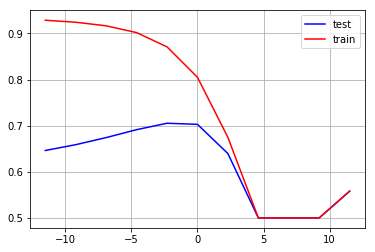

In [99]:
test_score=grid_search.cv_results_["mean_test_score"]
train_score=grid_search.cv_results_["mean_train_score"]
%matplotlib inline
hyperparameter=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**0,10**1,10**2,10**3,10**4,10**5]
plt.plot(np.log(hyperparameter),list(test_score),color='blue',label="test")
plt.plot(np.log(hyperparameter),list(train_score),color='red',label="train") 
plt.legend()
plt.grid()
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score,auc

In [57]:
final_1_model=MultinomialNB(alpha=0.1,class_prior=[0.5,0.5])
final_1_model.fit(abs(x_train_data),y__train)
pred_y_train=final_1_model.predict(x_train_data)
prob_y_train=final_1_model.predict_proba(x_train_data)
pred_y_test=final_1_model.predict(x_test_data)
prob_y_test=final_1_model.predict_proba(x_test_data)

In [58]:
fpr,tpr,thresholds=roc_curve(y__train,prob_y_train[:,1])
fpr_test,tpr_test,thresholds_test=roc_curve(y__test,prob_y_test[:,1])

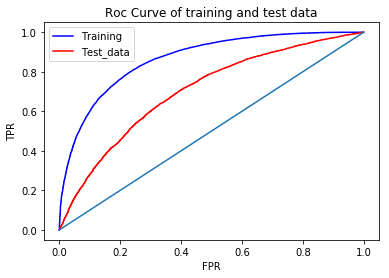

In [59]:
%matplotlib inline
plt.plot(fpr,tpr,label="Training",color="Blue")
plt.plot(fpr_test,tpr_test,label="Test_data",color="Red")
plt.plot([0,1],[0,1])
plt.title("Roc Curve of training and test data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

<b>Observation</b>
From the roc curve i can say that area under roc curve of training data is more than area under roc curve of test data.

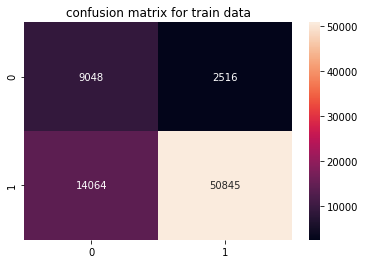

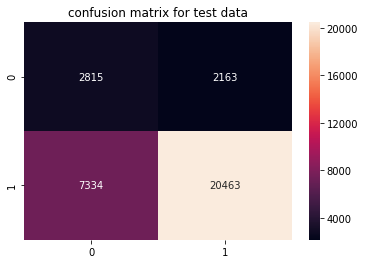

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y__train,pred_y_train),annot=True,fmt="d")
plt.title("confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y__test,pred_y_test),annot=True,fmt="d")
plt.title("confusion matrix for test data")
plt.show()

#### 2.4.1.1 Top 10 important features of positive class from<font color='red'> SET 1</font>

In [61]:
# Please write all the code with proper documentation.

In [96]:

features_list=["price","teacher_number_of_previously_posted_projects"]+list(vectorizer_1.get_feature_names())+list(vectorizer_2.get_feature_names())+list(vectorizer_3.get_feature_names())+list(vectorizer_4.get_feature_names())+list(vectorizer_5.get_feature_names())+list(vectorizer_6.get_feature_names())+list(vectorizer_7.get_feature_names())
a = final_1_model.feature_log_prob_
b = a[1].argsort()[-11:-1][::-1]
print(" So the top 10 features of positive class are--")
for i in range(10):
 print("feature name : %s , value : %f"%(features_list[b[i]],float(a[1,b[i]])))

 So the top 10 features of positive class are--
feature name : school , value : -4.156226
feature name : learning , value : -4.524651
feature name : classroom , value : -4.545158
feature name : not , value : -4.813156
feature name : learn , value : -4.860345
feature name : help , value : -4.889564
feature name : many , value : -5.030629
feature name : nannan , value : -5.046428
feature name : need , value : -5.158686
feature name : work , value : -5.160292


<b><font color='red'> I have used text data to find the top 10 important features.
    I apply countvectorizer on text data.<font/><b/>

#### 2.4.1.2 Top 10 important features of negative class from<font color='red'> SET 1</font>

In [63]:
# Please write all the code with proper documentation

In [95]:
a = final_1_model.feature_log_prob_
b = a[0].argsort()[-11:-1][::-1]
print(" So the top 10 features of negative class are--")
for i in range(10):
 print("feature name : %s , value : %f"%(features_list[b[i]],float(a
[0,b[i]])))

 So the top 10 features of negative class are--
feature name : school , value : -4.106025
feature name : learning , value : -4.444614
feature name : classroom , value : -4.598886
feature name : not , value : -4.793968
feature name : learn , value : -4.807622
feature name : help , value : -4.825050
feature name : nannan , value : -4.994218
feature name : many , value : -5.025575
feature name : need , value : -5.127980
feature name : work , value : -5.165625


### 2.4.2 Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

In [65]:
# Please write all the code with proper documentation

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
x_train,x_test,y_train,y_test=train_test_split(data_set_0,project_data["project_is_approved"].values,test_size=0.3,random_state=2)
tfidf_vectorizer_1=TfidfVectorizer()
title_train_one_hot=tfidf_vectorizer_1.fit_transform(x_train["preprocessed_titles"].values)
title_test_one_hot=tfidf_vectorizer_1.transform(x_test["preprocessed_titles"].values)
tfidf_vectorizer_2=TfidfVectorizer()
essay_train_one_hot=tfidf_vectorizer_2.fit_transform(x_train["preprocessed_essays"].values)
essay_test_one_hot=tfidf_vectorizer_2.transform(x_test["preprocessed_essays"].values)
x_train_data_2=hstack((price_one_hot,teacher_num_one_hot,categories_one_hot,subcategories_one_hot,school_state_one_hot,teacher_prefix_one_hot,project_grade_one_hot,title_train_one_hot,essay_train_one_hot))
x_test_data_2=hstack((test_price_one_hot,test_teacher_num_one_hot,test_category_one_hot,test_subcategories_one_hot,test_school_state_one_hot,teat_prefix_one_hot,test_project_grade_one_hot,title_test_one_hot,essay_test_one_hot))

In [67]:
alpha_range=[{"alpha":[10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5]}]
mnb_2=MultinomialNB(class_prior=[0.5,0.5])
model=GridSearchCV(mnb_2,alpha_range,cv=10,scoring="roc_auc")
model.fit(abs(x_train_data_2),y_train)
print(model.best_estimator_)
print("="*50)
print(model.score(x_test_data_2,y_test))

MultinomialNB(alpha=0.1, class_prior=[0.5, 0.5], fit_prior=True)
0.6728947947289259


<b>Observation:-</b>
from the above curve between area under roc curve and range of the log of alpha, i observed that the maximum value of auc is 0.6727 and it is for alpha=0.1

In [68]:
model.best_estimator_

MultinomialNB(alpha=0.1, class_prior=[0.5, 0.5], fit_prior=True)

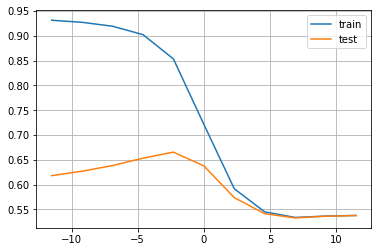

In [69]:
cv_score=model.cv_results_["mean_test_score"]
train_score=model.cv_results_["mean_train_score"]
%matplotlib inline
plt.plot(np.log(hyperparameter),train_score,label="train")
plt.plot(np.log(hyperparameter),cv_score,label="test")
plt.legend()
plt.grid()
plt.show()

In [70]:
final_mnb_2=MultinomialNB(alpha=0.1,class_prior=[0.5,0.5])
final_mnb_2.fit(abs(x_train_data_2),y_train)
pred_train_2=final_mnb_2.predict(x_train_data_2)
pred_test_2=final_mnb_2.predict(x_test_data_2)
prob_train_2=final_mnb_2.predict_proba(x_train_data_2)
prob_test_2=final_mnb_2.predict_proba(x_test_data_2)

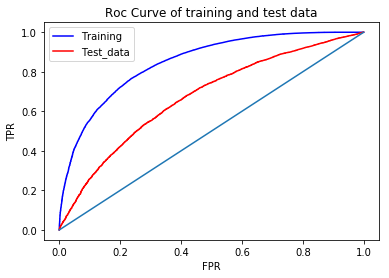

In [71]:
fpr_train,tpr_train,thresholds=roc_curve(y_train,prob_train_2[:,1])
fpr_test,tpr_test,thresholds=roc_curve(y_test,prob_test_2[:,1])
plt.plot(fpr_train,tpr_train,label="Training",color="Blue")
plt.plot(fpr_test,tpr_test,label="Test_data",color="Red")
plt.plot([0,1],[0,1])
plt.title("Roc Curve of training and test data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

<b>Observation:-</b>

area under roc curve of trainig data is more than area under roc curve for test data

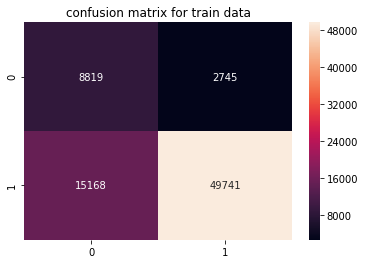

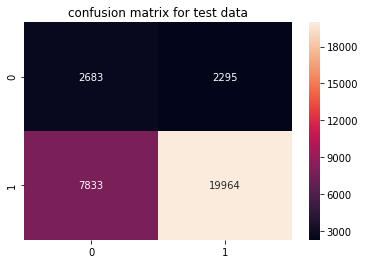

In [72]:
sns.heatmap(confusion_matrix(y_train,pred_train_2),annot=True,fmt="d")
plt.title("confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_2),annot=True,fmt="d")
plt.title("confusion matrix for test data")
plt.show()

#### 2.4.2.1 Top 10 important features of positive class from<font color='red'> SET 2</font>

In [97]:
# Please write all the code with proper documentation
features_list_set_2=["price","teacher_number_of_previously_posted_projects"]+list(vectorizer_1.get_feature_names())+list(vectorizer_2.get_feature_names())+list(vectorizer_3.get_feature_names())+list(vectorizer_4.get_feature_names())+list(vectorizer_5.get_feature_names())+list(tfidf_vectorizer_1.get_feature_names())+list(tfidf_vectorizer_2.get_feature_names())
a = final_mnb_2.feature_log_prob_
b = a[1].argsort()[-11:-1][::-1]
print(" So the top 10 features of positive class are--")
for i in range(10):
 print("feature name : %s , value : %f"%(features_list_set_2[b[i]],float(a
[1,b[i]])))


 So the top 10 features of positive class are--
feature name : Mrs , value : -3.502842
feature name : teacher_number_of_previously_posted_projects , value : -3.526267
feature name : Literacy_Language , value : -3.582787
feature name : GradesPreK2 , value : -3.771880
feature name : Math_Science , value : -3.844772
feature name : Ms , value : -3.906037
feature name : Grades35 , value : -3.934813
feature name : Literacy , value : -4.015715
feature name : Mathematics , value : -4.224963
feature name : Literature_Writing , value : -4.446862


#### 2.4.2.2 Top 10 important features of negative class from<font color='red'> SET 2</font>

In [98]:
# Please write all the code with proper documentation
a = final_mnb_2.feature_log_prob_
b = a[0].argsort()[-11:-1][::-1]
print(" So the top 10 features of negative class are--")
for i in range(10):
 print("feature no : %s , value : %f"%(features_list_set_2[b[i]],float(a[0
,b[i]])))


 So the top 10 features of negative class are--
feature no : Mrs , value : -3.570007
feature no : Literacy_Language , value : -3.731506
feature no : GradesPreK2 , value : -3.783034
feature no : teacher_number_of_previously_posted_projects , value : -3.787684
feature no : Math_Science , value : -3.794878
feature no : Ms , value : -3.869751
feature no : Grades35 , value : -4.000249
feature no : Mathematics , value : -4.219801
feature no : Literacy , value : -4.232807
feature no : Literature_Writing , value : -4.530034


<h1>3. Conclusions</h1>

In [75]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=("vectorizer","Model","Hyperparameter","AUC")
table.add_row(["BOW","MultinomialNB","0.1","0.708"])
table.add_row(["TFIDF","MultinomialNB","0.1","0.678"])
print(table)

+------------+---------------+----------------+-------+
| vectorizer |     Model     | Hyperparameter |  AUC  |
+------------+---------------+----------------+-------+
|    BOW     | MultinomialNB |      0.1       | 0.708 |
|   TFIDF    | MultinomialNB |      0.1       | 0.678 |
+------------+---------------+----------------+-------+


<b>Conclusion:-<b/>   
MOdel 1 on BOW gives 0.708 area under roc curve with hyperparameter 0.1  while model 2 ON TFIDF gives 0.678 area under curve with hyperparameter 0.1 which is alpha.

Thus we can say that my MultinomialNB on BOW performs better than model on TFIDF.